<a href="https://colab.research.google.com/github/jnoms/SV40_transcriptome/blob/main/bin/colab/Figure1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Import data

In [1]:
%%capture

! wget https://zenodo.org/record/5593507/files/2021-10-22_PyV_transcriptome.zip?download=1
! unzip 2021-10-22_PyV_transcriptome.zip?download=1
! mkdir data
! mv 2021-10-22_PyV_transcriptome/processed_data data/inputs
! cp 2021-10-22_PyV_transcriptome/code/R/UTILS* data

## Set up enviornment

In [2]:
%load_ext rpy2.ipython


In [3]:
%%capture
%%R 

install.packages("plyr")
install.packages("tidyverse")
install.packages("scales")
install.packages("patchwork")
install.packages("gggenes")
install.packages("reshape2")
install.packages("hash")
install.packages("ggridges")
install.packages("UpSetR")

In [4]:
%%capture
%%R 

library("plyr")
library("tidyverse")
library("scales")
library("patchwork")
library("gggenes")
library("reshape2")
library("hash")
library("ggridges")
library("UpSetR")

COLAB CONSTANTS

In [5]:
%%R


PREFIX <- "data"

## Import functions and constants

In [6]:
%%R

functions_path <- paste(PREFIX, "UTILS_functions.R", sep="/")
source(functions_path)


Script constants

In [7]:
%%R

#-----------------------------------------------------------------------------------------------#
# Constants
#-----------------------------------------------------------------------------------------------#

# Old color scheme
# virus_gene_fill = c("Agnoprotein" = "#177e89",
#                     "VP1" = "#82C0CC",
#                     "VP2" = "#db3a34",
#                     "VP3" = "#ffc857",
#                     "ST" = "#ff7d00",
#                     "LT" = "#1A936F",
#                     "MT" = "#9c6644",
#                     
#                     # BSPyV1
#                     "Cygno" = "#fb8b24",
#                     "VP1e"  = "#9a031e")

# Pallete: https://gka.github.io/palettes/#/9|d|00429d,96ffea,ffffe0|ffffe0,ff005e,93003a|1|1
virus_gene_fill = c("Agnoprotein" = "#00429d",
                    "VP1" = "#4771b2",
                    "VP2" = "#a5d5d8",
                    "VP3" = "#73a2c6",
                    "ST" = "#f4777f",
                    "LT" = "#93003a",
                    "MT" = "#9c6644")
                    
                    # BSPyV1
                    #"Cygno" = "#fb8b24",
                    #"VP1e"  = "#9a031e"

span_colors <- c("exon" = '#e63946',
                 "intron" = "#FFDDD6")

virus_specific_colors <- c(
  "SV40" = "#006d77",
  "BKPyV (Dunlop)" = "#3d5a80",
  "BKPyV (Dik)" = "#98c1d9",
  "JCPyV" = "#ee6c4d",
  "MPyV" = "#772e25",
  "MCPyVSyn" = "#EE4266", 
  "MCPyV" = "#EE4266", 
  "HPyV7" = "#000000",
  "BSPyV1" = "#90be6d"
)

virus_order <- c("SV40", "BKPyV (Dunlop)", "BKPyV (Dik)", "MPyV", "JCPyV", "MCPyVSyn", "MCPyV", "HPyV7", "BSPyV1")


genome_lengths <- genome_lengths <- c("SV40" = 5243, "BKPyV" = 5153, "JCPyV" = 5130, "MPyV" = 5307, "MCPyV"=5387, "HPyV7"=4952, "BSPyV1"=5421)


strand_colors = c("+" = "#0f4c5c", "-" = "#9a031e")

technology_colors <- c("dRNAseq" = "#BA8CA4",
                       "SMRTseq" = "#f2cc8f",
                       "Illumina" = "#8DA1B9")

#-----------------------------------------------------------------------------------------------#
# gggenes
#-----------------------------------------------------------------------------------------------#

# GGGENES - SV40
#----------------------------------------------#
# SINGLE
sv40_genes <- tibble(
  molecule = "SV40",
  gene = c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT", "LT" ),
  start = c(235, 1399, 462, 816, 4539, 2591, 4818),
  end = c(423, 2493, 1520, 1520, 5063, 4471, 5063),
  strand = c("forward", "forward", "forward", "forward", "reverse", "reverse", "reverse"),
  direction = c(1, 1, 1, 1, -1, -1, -1),
  exon = c(1, 1, 1, 1, 1, 1, 2)
)

# Order for plotting
sv40_genes$gene <- factor(sv40_genes$gene, levels=c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT"), ordered = T)


# DOUBLE
sv40_genes_x2 <- rbind(
  sv40_genes %>% mutate(copy = 1),
  sv40_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5243)) %>%
  mutate(end = end + ((copy -1) * 5243))

# Ten!
sv40_genes_x10 <- rbind(
  sv40_genes %>% mutate(copy = 1),
  sv40_genes %>% mutate(copy = 2),
  sv40_genes %>% mutate(copy = 3),
  sv40_genes %>% mutate(copy = 4),
  sv40_genes %>% mutate(copy = 5),
  sv40_genes %>% mutate(copy = 6),
  sv40_genes %>% mutate(copy = 7),
  sv40_genes %>% mutate(copy = 8),
  sv40_genes %>% mutate(copy = 9),
  sv40_genes %>% mutate(copy = 10)
) %>%
  mutate(start = start + ((copy -1) * 5243)) %>%
  mutate(end = end + ((copy -1) * 5243))

sv40_genes_x20 <- rbind(
  sv40_genes %>% mutate(copy = 1),
  sv40_genes %>% mutate(copy = 2),
  sv40_genes %>% mutate(copy = 3),
  sv40_genes %>% mutate(copy = 4),
  sv40_genes %>% mutate(copy = 5),
  sv40_genes %>% mutate(copy = 6),
  sv40_genes %>% mutate(copy = 7),
  sv40_genes %>% mutate(copy = 8),
  sv40_genes %>% mutate(copy = 9),
  sv40_genes %>% mutate(copy = 10),
  sv40_genes %>% mutate(copy = 11),
  sv40_genes %>% mutate(copy = 12),
  sv40_genes %>% mutate(copy = 13),
  sv40_genes %>% mutate(copy = 14),
  sv40_genes %>% mutate(copy = 15),
  sv40_genes %>% mutate(copy = 16),
  sv40_genes %>% mutate(copy = 17),
  sv40_genes %>% mutate(copy = 18),
  sv40_genes %>% mutate(copy = 19),
  sv40_genes %>% mutate(copy = 20)
) %>%
  mutate(start = start + ((copy -1) * 5243)) %>%
  mutate(end = end + ((copy -1) * 5243))
#----------------------------------------------#


# GGGENES - BK
#----------------------------------------------#
# GENOME LEN IS 5153

# SINGLE
bk_genes <- tibble(
  molecule = "BK",
  gene = c("Agnoprotein", "VP2", "VP3", "VP1","ST","LT", "LT"),
  start = c(388, 624, 981, 1564, 4635, 2722, 4911),
  end = c(588, 1679, 1679, 2652, 5153, 4566, 5153),
  strand = c("forward", "forward", "forward", "forward", "reverse", "reverse", "reverse"),
  direction = c(1, 1, 1, 1, -1, -1, -1),
  exon = c(1, 1, 1, 1, 1, 1, 2)
)

# Order for plotting
bk_genes$gene <- factor(bk_genes$gene, levels=c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT"), ordered = T)


# double
bk_genes_x2 <- rbind(
  bk_genes %>% mutate(copy = 1),
  bk_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5153)) %>%
  mutate(end = end + ((copy -1) * 5153))


# ten
bk_genes_x10 <- rbind(
  bk_genes %>% mutate(copy = 1),
  bk_genes %>% mutate(copy = 2),
  bk_genes %>% mutate(copy = 3),
  bk_genes %>% mutate(copy = 4),
  bk_genes %>% mutate(copy = 5),
  bk_genes %>% mutate(copy = 6),
  bk_genes %>% mutate(copy = 7),
  bk_genes %>% mutate(copy = 8),
  bk_genes %>% mutate(copy = 9),
  bk_genes %>% mutate(copy = 10)
) %>%
  mutate(start = start + ((copy -1) * 5153)) %>%
  mutate(end = end + ((copy -1) * 5153))

bk_genes_x20 <- rbind(
  bk_genes %>% mutate(copy = 1),
  bk_genes %>% mutate(copy = 2),
  bk_genes %>% mutate(copy = 3),
  bk_genes %>% mutate(copy = 4),
  bk_genes %>% mutate(copy = 5),
  bk_genes %>% mutate(copy = 6),
  bk_genes %>% mutate(copy = 7),
  bk_genes %>% mutate(copy = 8),
  bk_genes %>% mutate(copy = 9),
  bk_genes %>% mutate(copy = 10),
  bk_genes %>% mutate(copy = 11),
  bk_genes %>% mutate(copy = 12),
  bk_genes %>% mutate(copy = 13),
  bk_genes %>% mutate(copy = 14),
  bk_genes %>% mutate(copy = 15),
  bk_genes %>% mutate(copy = 16),
  bk_genes %>% mutate(copy = 17),
  bk_genes %>% mutate(copy = 18),
  bk_genes %>% mutate(copy = 19),
  bk_genes %>% mutate(copy = 20)
) %>%
  mutate(start = start + ((copy -1) * 5153)) %>%
  mutate(end = end + ((copy -1) * 5153))
#----------------------------------------------#

# gggenes - MPyV
#----------------------------------------------#
# GENOME LENGTH IS 5307

# SINGLE
MPyV_genes <- tibble(
  molecule = "MPyV",
  gene = c("LT", "LT", "MT", "MT", "ST", "ST", "VP1", "VP2", "VP3"),
  end = c(175, 797, 175, 811, 175, 794, 2932, 4055, 4055),
  start = c(411, 2908, 748, 1502, 748, 810, 4086, 5014, 4669),
  strand = c("reverse", "reverse", "reverse", "reverse", "reverse", "reverse", "forward", "forward", "forward"),
  direction = c(-1, -1, -1, -1, -1, -1, 1, 1, 1),
  exon = c(2, 1, 1, 1, 1, 1, 1, 1, 1)
) 

# NOTE - I reverse complemented the reference genome. Above, I am marking the NEW/ADJUSTED strand/direction, but the OLD coordinates. To correct the coordinates, will subtract them all from genome length below. I also inverted the start/end above, so they end up the correct orientation after adjustment:
MPyV_genes <- MPyV_genes %>%
  mutate(start = 5307 - start) %>%
  mutate(end = 5307 - end) %>%
  arrange(start)

# Order for plotting
MPyV_genes$gene <- factor(MPyV_genes$gene, levels=c("VP2", "VP3", "VP1", "ST", "LT", "MT"), ordered = T)


# DOUBLE
MPyV_genes_x2 <- rbind(
  MPyV_genes %>% mutate(copy = 1),
  MPyV_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5307)) %>%
  mutate(end = end + ((copy -1) * 5307))


# 20x
MPyV_genes_x20 <- rbind(
  MPyV_genes %>% mutate(copy = 1),
  MPyV_genes %>% mutate(copy = 2),
  MPyV_genes %>% mutate(copy = 3),
  MPyV_genes %>% mutate(copy = 4),
  MPyV_genes %>% mutate(copy = 5),
  MPyV_genes %>% mutate(copy = 6),
  MPyV_genes %>% mutate(copy = 7),
  MPyV_genes %>% mutate(copy = 8),
  MPyV_genes %>% mutate(copy = 9),
  MPyV_genes %>% mutate(copy = 10),
  MPyV_genes %>% mutate(copy = 11),
  MPyV_genes %>% mutate(copy = 12),
  MPyV_genes %>% mutate(copy = 13),
  MPyV_genes %>% mutate(copy = 14),
  MPyV_genes %>% mutate(copy = 15),
  MPyV_genes %>% mutate(copy = 16),
  MPyV_genes %>% mutate(copy = 17),
  MPyV_genes %>% mutate(copy = 18),
  MPyV_genes %>% mutate(copy = 19),
  MPyV_genes %>% mutate(copy = 20)
) %>%
  mutate(start = start + ((copy -1) * 5307)) %>%
  mutate(end = end + ((copy -1) * 5307))
#----------------------------------------------#



# gggenes - JC
#----------------------------------------------#
# GENOME LEN IS 5130

# SINGLE
jc_genes <- tibble(
  molecule = "JC",
  gene = c("Agnoprotein", "VP2", "VP3", "VP1","ST","LT", "LT"),
  start = c(277, 526, 883, 1469, 4495, 2603, 4771),
  end = c(492, 1560, 1560, 2533, 5013, 4426, 5013),
  strand = c("forward", "forward", "forward", "forward", "reverse", "reverse", "reverse"),
  direction = c(1, 1, 1, 1, -1, -1, -1),
  exon = c(1, 1, 1, 1, 1, 1, 2)
)


# Order for plotting
jc_genes$gene <- factor(jc_genes$gene, levels=c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT"), ordered = T)


# DOUBLE
jc_genes_x2 <- rbind(
  jc_genes %>% mutate(copy = 1),
  jc_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5130)) %>%
  mutate(end = end + ((copy -1) * 5130))
#----------------------------------------------#


# gggenes - MCPyV
#----------------------------------------------#
# GENOME LEN IS 5387

# SINGLE
MCPyV_genes <- tibble(
  molecule = "MCPyV",
  gene = c("VP2", "VP1","ST","LT", "LT"),
  start = c(465, 1156, 4827, 2503, 5154),
  end = c(1190, 2427, 5387, 4722, 5387),
  strand = c("forward", "forward", "reverse", "reverse", "reverse"),
  direction = c(1, 1, -1, -1, -1),
  exon = c(1, 1, 1, 1, 2)
)


# Order for plotting
MCPyV_genes$gene <- factor(MCPyV_genes$gene, levels=c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT"), ordered = T)


# DOUBLE
MCPyV_genes_x2 <- rbind(
  MCPyV_genes %>% mutate(copy = 1),
  MCPyV_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5387)) %>%
  mutate(end = end + ((copy -1) * 5387))
#----------------------------------------------#


# gggenes - HPyV7
#----------------------------------------------#
# GENOME LEN IS 4952

# SINGLE
HPyV7_genes <- tibble(
  molecule = "MCPyV",
  gene = c("VP2", "VP3", "VP1","ST","LT", "LT"),
  start = c(386, 746, 1305, 4371, 2532, 4707),
  end = c(1375, 1375, 2447, 4952, 4301, 4952),
  strand = c("forward", "forward", "forward", "reverse", "reverse", "reverse"),
  direction = c(1, 1, 1, -1, -1, -1),
  exon = c(1, 1, 1, 1, 1, 2)
)


# Order for plotting
HPyV7_genes$gene <- factor(HPyV7_genes$gene, levels=c("Agnoprotein", "VP1", "VP2", "VP3", "ST", "LT"), ordered = T)


# DOUBLE
HPyV7_genes_x2 <- rbind(
  HPyV7_genes %>% mutate(copy = 1),
  HPyV7_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 4952)) %>%
  mutate(end = end + ((copy -1) * 4952))
#----------------------------------------------#


# gggenes - BSPyV1
#----------------------------------------------#
# GENOME LEN IS 5421

# SINGLE
BSPyV1_genes <- tibble(
  molecule = "MCPyV",
  gene = c("Cygno", "VP2", "VP1", "VP1","VP1","VP1e", "LT", "LT"),
  start = c(387, 664,  1199,  1559, 2463,  3116,   3570, 5374  ),
  end =  c(725, 1263,  1406,  2421, 3047,  3562,   5192, 5421 ),
  strand = c("forward", "forward", "forward", "forward", "forward", "forward", "reverse", "reverse"),
  direction = c(1, 1, 1, 1, 1, 1, -1, -1),
  exon = c(1, 1, 1, 1, 1, 1, 1, 2)
)


# Order for plotting
BSPyV1_genes$gene <- factor(BSPyV1_genes$gene, levels=c("Cygno", "VP1", "VP2", "VP1e", "LT"), ordered = T)


# DOUBLE
BSPyV1_genes_x2 <- rbind(
  BSPyV1_genes %>% mutate(copy = 1),
  BSPyV1_genes %>% mutate(copy = 2)
) %>%
  mutate(start = start + ((copy -1) * 5421)) %>%
  mutate(end = end + ((copy -1) * 5421))

#----------------------------------------------#




## Load data

In [8]:
%%R

#-----------------------------------------------------------------------------------------------#
# SV40 dRNAseq/PacBio
#-----------------------------------------------------------------------------------------------#

# Notes on several transcripts classes that must be removed below:
#------------------------------------------------------------------#
# SV40
#
# 1) 
# For the dRNAseq alignments, it seems that some late transcripts are mapped to 426_6605.. which should actually
# be 426_1362. This is transcript class 13 in rep1, and 11 in rep 2. This is an alignment
# error of unknown etiology during minimap2 alignment. BLAST confirms that they should actually be 426_1362. 
# Because I don't want to manually edit their information, even here programatically, I will just discard them.
# 2)
# Remove transcripts that are assigned to the transcript class that includes the junction 277-->457. These
# junctions are actually 273-457. The situation is that the junction sites have a bit of complementarity,
# and with the error-prone long reads (especially nanopore) an insertion/duplication can lead to placement
# at 277 near a subsequent GT that is actually within the intron. This model is supported by the fact that
# 277 is very very low abundance in the more accurate illumina data.
# 277-->457 is tx_class 6 in both nanopore replicates, and tx_class 12 in the pacbio data.

# BKPyV
#
# 1)
# PacBio Class 110, which is 6668_5737, is very low abundance and really doesn't make much sense. Not present in NP
# data. I think it's a pacbio artifact of some sort...
# 2) 
# dRNAseq class 16 and SMRTseq class 8. While this is "real", it is either a splice intermediate or 5' truncated transcripts
# that are missing the other junction(s). For this reason, I will remove.
#------------------------------------------------------------------#

# Notes on transcript additions
#------------------------------------------------------------------#
# Sometimes, alignment of repetative regions in SMRTseq data and dRNAseq data
# is challenging by minimap2. This is usually neglidgible, but in the case of 
# superT, which is relatively low abundance, many of the superT transcripts fail
# to map correctly! This, for the dRNAseq/SMRTseq datasets that "don't" have superT
# because of an alignment error, but I find superT manually, I will modify one
# of these reads such that superT is accurately marked as present in that dataset.
# Note that I only do this for one representative and only where superT is not 
# present already. Thus, the abundance of superT is actually higher than it
# appears.


SV40_dRNA <- read_delim(paste(PREFIX, "inputs/SV40/dRNA/dRNA_MOI1-48_spans.txt", sep="/"), delim="\t") %>%
  format_dRNAseq_inputs() %>%
  filter(!tx_class == 13, !tx_class == 6)

# Add the mis-mapped superT
#----------------------------#
SV40_dRNA_superT_entry <- tibble(
  name = "ce9ed2ef-0d18-4636-8b02-ac745b841a48",
  start = c(4471, 9567, 9714, 10060, 10400),
  end = c(2494, 4471, 9567, 9714, 10060),
  strand = "-",
  span_type = c("exon", "intron", "exon", "intron", "exon"),
  tx_start = 10400,
  tx_end = 2494,
  tx_class = 99999,
  tx_class_count = 1,
  tx_class_illumina_support = "supported"
)

SV40_dRNA <- SV40_dRNA %>%
  filter(name != "ce9ed2ef-0d18-4636-8b02-ac745b841a48") %>%
  rbind(SV40_dRNA_superT_entry)
#---------------------------#

SV40_dRNA_f <- SV40_dRNA %>%
  filter(strand == "+") 
SV40_dRNA_r <- SV40_dRNA %>%
  filter(strand == "-")

SV40_dRNA_rep2 <- read_delim(paste(PREFIX, "inputs/SV40/dRNA/SV40_dRNA_MOI1-48_rep2_spans.txt", sep="/"), delim="\t") %>%
  format_dRNAseq_inputs() %>%
  filter(!tx_class == 11, !tx_class == 6)

SV40_dRNA_rep2_f <- SV40_dRNA_rep2 %>%
  filter(strand == "+")
SV40_dRNA_rep2_r <- SV40_dRNA_rep2 %>%
  filter(strand == "-")




SV40_SMRTseq <- read_delim(paste(PREFIX, "inputs/SV40/pacbio/SV40.flnc_spans.txt", sep="/"), delim="\t") %>%
  format_dRNAseq_inputs() %>%
  filter(tx_class != 12)

# Add the mis-mapped superT
#----------------------------#
SV40_SMRTseq_superTstar_entry <- tibble(
  name = "m64060_210414_171939/1116322/ccs",
  start = c(4471, 9567, 9714, 9780, 10025),
  end = c(2486, 4471, 9567, 9714, 9780),
  strand = "-",
  span_type = c("exon", "intron", "exon", "intron", "exon"),
  tx_start = 10025,
  tx_end = 2486,
  tx_class = 99999,
  tx_class_count = 1,
  tx_class_illumina_support = "supported"
)
SV40_SMRTseq <- SV40_SMRTseq %>%
  filter(name != "m64060_210414_171939/1116322/ccs") %>%
  rbind(SV40_SMRTseq_superTstar_entry)
#----------------------------#

SV40_SMRTseq_f <- SV40_SMRTseq %>%
  filter(strand == "+")
SV40_SMRTseq_r <- SV40_SMRTseq %>%
  filter(strand == "-")



#-----------------------------------------------------------------------------------------------#
# BK dRNAseq/PacBio
#-----------------------------------------------------------------------------------------------#
BK_dunlop1_dRNA <- read_delim(paste(PREFIX, "inputs/BKPyV/dRNA/dRNA_BK_Dunlop_4dpi_spans.txt", sep="/"), delim="\t") %>%
  format_dRNAseq_inputs() %>%
  filter(tx_class != 16)

BK_dunlop1_dRNA_f <- BK_dunlop1_dRNA %>%
  filter(strand == "+")
BK_dunlop1_dRNA_r <- BK_dunlop1_dRNA %>%
  filter(strand == "-")



BK_SMRTseq <- read_delim(paste(PREFIX, "inputs/BKPyV/pacbio/BK.flnc_spans.txt", sep="/"), delim="\t") %>%
  format_dRNAseq_inputs() %>%
  filter(tx_class != 110, tx_class != 8)
# Add the mis-mapped superT
#----------------------------#
BK_SMRTseq_superT_entry <- tibble(
  name = "m64060_210415_173424/40961198/ccs",
  start = c(4566, 9563, 9719, 10063, 10567),
  end = c(2645, 4566, 9563, 9719, 10063),
  strand = "-",
  span_type = c("exon", "intron", "exon", "intron", "exon"),
  tx_start = 10567,
  tx_end = 2645,
  tx_class = 99999,
  tx_class_count = 1,
  tx_class_illumina_support = "supported"
)

BK_SMRTseq <- BK_SMRTseq %>%
  filter(name != "m64060_210415_173424/40961198/ccs") %>%
  rbind(BK_SMRTseq_superT_entry)
#----------------------------#


BK_SMRTseq_f <- BK_SMRTseq %>%
  filter(strand == "+")
BK_SMRTseq_r <- BK_SMRTseq %>%
  filter(strand == "-")


#-----------------------------------------------------------------------------------------------#
# MPyV dRNAseq
#-----------------------------------------------------------------------------------------------#
MPyV_dRNA <- read_delim(paste(PREFIX, "inputs/MPyV/dRNA/MPyV_dRNAseq_spans.txt", sep="/"), delim="\t") %>% format_dRNAseq_inputs()

MPyV_dRNA_f <- MPyV_dRNA %>%
  filter(strand == "+")
MPyV_dRNA_r <- MPyV_dRNA %>%
  filter(strand == "-")



#-----------------------------------------------------------------------------------------------#
# Transcript annotations and labels
# The transcript tibbles originate from Fig1
#-----------------------------------------------------------------------------------------------#
SV40_transcript_tibble <- read_delim(paste(PREFIX, "inputs/supplementary_tables/Table1_SV40_transcripts.tsv", sep="/"), delim="\t")
SV40_SMRTseq_labels <- SV40_transcript_tibble %>% mutate(label = paste(ID, description, sep="_")) %>% pull(label)
names(SV40_SMRTseq_labels) <- SV40_transcript_tibble$SMRTseq_tx_class
SV40_dRNAseq_labels <- SV40_transcript_tibble %>% mutate(label = paste(ID, description, sep="_")) %>% pull(label)
names(SV40_dRNAseq_labels) <- SV40_transcript_tibble$dRNAseq_tx_class

# Add unspliced labels
SV40_dRNAseq_labels <- c(SV40_dRNAseq_labels, `-2` = "U", `-1` = "U")
SV40_SMRTseq_labels <- c(SV40_SMRTseq_labels, `-2` = "U", `-1` = "U")



BK_transcript_tibble <- read_delim(paste(PREFIX, "inputs/supplementary_tables/Table2_BKPyV_Dunlop_transcripts.tsv", sep="/"), delim="\t")
BK_SMRTseq_labels <- BK_transcript_tibble %>% mutate(label = paste(ID, description, sep="_")) %>% pull(label)
names(BK_SMRTseq_labels) <- BK_transcript_tibble$SMRTseq_tx_class
BK_dRNAseq_labels <- BK_transcript_tibble %>% mutate(label = paste(ID, description, sep="_")) %>% pull(label)
names(BK_dRNAseq_labels) <- BK_transcript_tibble$dRNAseq_tx_class

# Add unspliced labels
BK_dRNAseq_labels <- c(BK_dRNAseq_labels, `-2` = "U", `-1` = "U")
BK_SMRTseq_labels <- c(BK_SMRTseq_labels, `-2` = "U", `-1` = "U")







#-----------------------------------------------------------------------------------------------#
# Illumina spans
#-----------------------------------------------------------------------------------------------#
# SV40_illumina_1_48 <- read_delim(paste(PREFIX, "inputs/SV40/illumina/SV40_1_48_spans.txt", sep="/"), delim="\t")  %>%
#   format_dRNAseq_inputs() %>% illumina_filter_out_of_quadrant(genome_lengths["SV40"])
# SV40_illumina_1_48_pA <- read_delim(paste(PREFIX, "inputs/SV40/illumina/SV40_1_48_pA_spans.txt", sep="/"), delim="\t") %>%
#   format_dRNAseq_inputs() %>% illumina_filter_out_of_quadrant(genome_lengths["SV40"])

# BK_Dik_1 <- read_delim(paste(PREFIX, "inputs/BKPyV/illumina/Dik-1_spans.txt", sep="/"), delim="\t")  %>%
#   format_dRNAseq_inputs() %>% illumina_filter_out_of_quadrant(genome_lengths["BKPyV"])
# BK_Dunlop_1 <- read_delim(paste(PREFIX, "inputs/BKPyV/illumina/Dunlop-1_spans_introns.txt", sep="/"), delim="\t")  %>%
#   format_dRNAseq_inputs() %>% illumina_filter_out_of_quadrant(genome_lengths["BKPyV"])
# BK_Dunlop_1_pA <- read_delim(paste(PREFIX, "inputs/BKPyV/illumina/Dunlop1_pA_spans_introns.txt", sep="/"), delim="\t")  %>%
#   format_dRNAseq_inputs() %>% illumina_filter_out_of_quadrant(genome_lengths["BKPyV"])

#   # Publically-available datasets
# BK_assetta_9dpi <- read_delim(paste(PREFIX, "inputs/BKPyV/illumina/assetta/BKPyV_9dpi_spans.txt", sep="/"), delim="\t")  %>%
#   format_dRNAseq_inputs() %>% illumina_filter_out_of_quadrant(genome_lengths["BKPyV"])

# JC_assetta_9dpi <- read_delim(paste(PREFIX, "inputs/JCPyV/assetta/JCPyV_9dpi_spans.txt", sep="/"), delim="\t")  %>%
#   format_dRNAseq_inputs() %>% illumina_filter_out_of_quadrant(genome_lengths["JCPyV"])

# M_garren_36hpi <- read_delim(paste(PREFIX, "inputs/MPyV/garren/MPyV_36hpi_spans.txt", sep="/"), delim="\t")  %>%
#   format_dRNAseq_inputs() %>% illumina_filter_out_of_quadrant(genome_lengths["MPyV"])

# MCPyVSyn_rep1 <- read_delim(paste(PREFIX, "inputs/MCPyV/theirr/MCPyVSyn_rep1_spans.txt", sep="/"), delim="\t")  %>%
#   format_dRNAseq_inputs %>% illumina_filter_out_of_quadrant(genome_lengths["MCPyV"])


# HPyV7 <- read_delim(paste(PREFIX, "inputs/HPyV7/rosenstein/hpyv7_spans.txt", sep="/"), delim="\t")  %>%
#   format_dRNAseq_inputs %>% illumina_filter_out_of_quadrant(genome_lengths["HPyV7"])


# BSPyV1 <- read_delim(paste(PREFIX, "inputs/BSPyV1/schmidlin_BSPyV1_spans.txt", sep="/"), delim="\t")  %>%
#   format_dRNAseq_inputs %>%
#   illumina_filter_out_of_quadrant(genome_lengths["BSPyV1"])


# #-----------------------------------------------------------------------------------------------#
# # Aggregated Illumina spans
# #-----------------------------------------------------------------------------------------------#
# illumina_collapsed_agg <- rbind(
#   SV40_illumina_1_48 %>% collapse_tx_classes() %>% mutate(virus="SV40"),
#   BK_Dunlop_1 %>% collapse_tx_classes() %>% mutate(virus="BKPyV (Dunlop)"),
#   BK_Dik_1 %>% collapse_tx_classes() %>% mutate(virus="BKPyV (Dik)"),
#   JC_assetta_9dpi %>% collapse_tx_classes() %>% mutate(virus="JCPyV"),
#   M_garren_36hpi %>% collapse_tx_classes() %>% mutate(virus="MPyV"),
#   MCPyVSyn_rep1 %>% collapse_tx_classes() %>% mutate(virus="MCPyV"),
#   HPyV7 %>% collapse_tx_classes() %>% mutate(virus="HPyV7"),
#   BSPyV1 %>% collapse_tx_classes() %>% mutate(virus="BSPyV1")
# ) %>%
#   mutate(genome_length = genome_lengths[virus]) %>%
#   mutate(genome_length = ifelse(grepl("BKPyV", virus), genome_lengths["BKPyV"], genome_length)) %>%
#   mutate(label = paste(virus, tx_class, sep="-"))


# illumina_collapsed_agg_including_pA <- illumina_collapsed_agg %>%
#   rbind(
#     SV40_illumina_1_48_pA %>% collapse_tx_classes() %>% mutate(virus="SV40 (pA)",
#                                                                genome_length = genome_lengths["SV40"],
#                                                                label =  paste(virus, tx_class, sep="-")),
#     BK_Dunlop_1_pA %>% collapse_tx_classes() %>% mutate(virus="BKPyV (Dunlop) (pA)",
#                                                                genome_length = genome_lengths["BKPyV"],
#                                                                label =  paste(virus, tx_class, sep="-"))
#   )

# #-----------------------------------------------------------------------------------------------#
# # Aggregated spans - ILLUMINA, NP, AND SMRTseq
# #-----------------------------------------------------------------------------------------------#
# ALL_collapsed_agg <- illumina_collapsed_agg %>%
#   mutate(Technology = "short-RNAseq (total)") %>%
#   rbind(
#     SV40_dRNA %>% collapse_tx_classes() %>% mutate(virus="SV40", 
#                                                    genome_length = genome_lengths["SV40"],
#                                                    label = paste(virus, tx_class, sep="-"),
#                                                    Technology = "dRNAseq"),
#     SV40_SMRTseq %>% collapse_tx_classes() %>% mutate(virus="SV40", 
#                                                  genome_length = genome_lengths["SV40"],
#                                                  label = paste(virus, tx_class, sep="-"),
#                                                  Technology = "SMRTseq"),
#     BK_dunlop1_dRNA %>% collapse_tx_classes() %>% mutate(virus="BKPyV (Dunlop)", 
#                                                          genome_length = genome_lengths["BKPyV"],
#                                                          label = paste(virus, tx_class, sep="-"),
#                                                          Technology = "dRNAseq"),
#     BK_SMRTseq %>% collapse_tx_classes() %>% mutate(virus="BKPyV (Dunlop)", 
#                                                genome_length = genome_lengths["BKPyV"],
#                                                label = paste(virus, tx_class, sep="-"),
#                                                Technology = "SMRTseq"),
#     MPyV_dRNA %>% collapse_tx_classes() %>% mutate(virus="MPyV", 
#                                                    genome_length = genome_lengths["MPyV"],
#                                                    label = paste(virus, tx_class, sep="-"),
#                                                    Technology = "dRNAseq")
#   ) %>% mutate(sample = paste(virus, Technology, sep="-"))

# ALL_collapsed_agg$sample <- ALL_collapsed_agg$sample %>% str_replace_all("short-RNAseq (total)", "\nshort-RNAseq (total)")

#-----------------------------------------------------------------------------------------------#
# Coverage
#-----------------------------------------------------------------------------------------------#

# SV40
#-----------------------------#
SV40_dRNA_cov_f <- read_delim(paste(PREFIX, "inputs/SV40/dRNA/dRNA_MOI1-48_slid_f.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>%
  aggregate_cov(genome_lengths["SV40"]) %>% normalize_cov()
SV40_dRNA_cov_r <- read_delim(paste(PREFIX, "inputs/SV40/dRNA/dRNA_MOI1-48_slid_r.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>%
  aggregate_cov(genome_lengths["SV40"]) %>% normalize_cov()

SV40_SMRTseq_cov_f <- read_delim(paste(PREFIX, "inputs/SV40/pacbio/SV40.flnc_slid_f.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>%
  aggregate_cov(genome_lengths["SV40"]) %>% normalize_cov()
SV40_SMRTseq_cov_r <- read_delim(paste(PREFIX, "inputs/SV40/pacbio/SV40.flnc_slid_r.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>%
  aggregate_cov(genome_lengths["SV40"]) %>% normalize_cov()

SV40_ttl_cov_f <- read_delim(paste(PREFIX, "inputs/SV40/illumina/SV40_1_48_slid_f.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>%
  aggregate_cov(genome_lengths["SV40"]) %>% normalize_cov()
SV40_ttl_cov_r <- read_delim(paste(PREFIX, "inputs/SV40/illumina/SV40_1_48_slid_r.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>%
  aggregate_cov(genome_lengths["SV40"]) %>% normalize_cov()


# Aggregate
SV40_cov_agg_f <- 
  rbind(
    SV40_dRNA_cov_f %>% mutate(Sequencing_Method = "NP"),
    SV40_SMRTseq_cov_f %>% mutate(Sequencing_Method = "SMRTseq"),
    SV40_ttl_cov_f %>% mutate(Sequencing_Method = "Illumina")
  ) %>%
  mutate(Sequencing_Method = factor(Sequencing_Method, ordered=T,
                                    levels=c("NP","SMRTseq","Illumina")))

SV40_cov_agg_r <- 
  rbind(
    SV40_dRNA_cov_r %>% mutate(Sequencing_Method = "NP"),
    SV40_SMRTseq_cov_r %>% mutate(Sequencing_Method = "SMRTseq"),
    SV40_ttl_cov_r %>% mutate(Sequencing_Method = "Illumina")
  ) %>%
  mutate(Sequencing_Method = factor(Sequencing_Method, ordered=T,
                                    levels=c("NP","SMRTseq","Illumina")))


# BK
#-----------------------------#
BK_dRNA_cov_f <- read_delim(paste(PREFIX, "inputs/BKPyV/dRNA/dRNA_BK_Dunlop_4dpi_slid_f.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>% aggregate_cov(genome_lengths["BKPyV"]) %>% normalize_cov()
BK_dRNA_cov_r <- read_delim(paste(PREFIX, "inputs/BKPyV/dRNA/dRNA_BK_Dunlop_4dpi_slid_r.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>% aggregate_cov(genome_lengths["BKPyV"]) %>% normalize_cov()

BK_SMRTseq_cov_f <- read_delim(paste(PREFIX, "inputs/BKPyV/pacbio/BK.flnc_slid_f.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>% aggregate_cov(genome_lengths["BKPyV"]) %>% normalize_cov()
BK_SMRTseq_cov_r <- read_delim(paste(PREFIX, "inputs/BKPyV/pacbio/BK.flnc_slid_r.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>% aggregate_cov(genome_lengths["BKPyV"]) %>% normalize_cov()

BK_ttl_cov_f <- read_delim(paste(PREFIX, "inputs/BKPyV/illumina/Dunlop-1_slid_f.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>% aggregate_cov(genome_lengths["BKPyV"]) %>% normalize_cov()
BK_ttl_cov_r <- read_delim(paste(PREFIX, "inputs/BKPyV/illumina/Dunlop-1_slid_r.cov", sep="/"), delim="\t", col_names = c("seq", "pos", "cov")) %>% aggregate_cov(genome_lengths["BKPyV"]) %>% normalize_cov()


# Aggregate
BK_cov_agg_f <- 
  rbind(
    BK_dRNA_cov_f %>% mutate(Sequencing_Method = "NP"),
    BK_SMRTseq_cov_f %>% mutate(Sequencing_Method = "SMRTseq"),
    BK_ttl_cov_f %>% mutate(Sequencing_Method = "Illumina")
  ) %>%
  mutate(Sequencing_Method = factor(Sequencing_Method, ordered=T,
                                    levels=c("NP","SMRTseq","Illumina")))
BK_cov_agg_r <- 
  rbind(
    BK_dRNA_cov_r %>% mutate(Sequencing_Method = "NP"),
    BK_SMRTseq_cov_r %>% mutate(Sequencing_Method = "SMRTseq"),
    BK_ttl_cov_r %>% mutate(Sequencing_Method = "Illumina")
  ) %>%
  mutate(Sequencing_Method = factor(Sequencing_Method, ordered=T,
                                    levels=c("NP","SMRTseq","Illumina")))



#-----------------------------------------------------------------------------------------------#
# PolyA tails
#-----------------------------------------------------------------------------------------------#
SV40_pA <- read_delim(paste(PREFIX, "inputs/SV40/dRNA/SV40_dRNA_MOI1-48_polya_results.tsv", sep="/"), delim="\t") %>% filter(qc_tag == "PASS")
SV40_host_pA <- read_delim(paste(PREFIX, "inputs/SV40/dRNA/SV40_MOI1-48_HOST_subsampled_100K_polya_results.tsv", sep="/"), delim="\t") %>% filter(qc_tag == "PASS")

BK_pA <- read_delim(paste(PREFIX, "inputs/BKPyV/dRNA/dRNA_BK_Dunlop_4dpi_viral_ENO2_polya_results.tsv", sep="/"), delim="\t") %>% filter(qc_tag == "PASS")
BK_host_pA <- read_delim(paste(PREFIX, "inputs/BKPyV/dRNA/dRNA_BK_Dunlop_4dpi_HUMAN_subsampled_100K_polya_results.tsv", sep="/"), delim="\t") %>% filter(qc_tag == "PASS")

MPyV_pA <- read_delim(paste(PREFIX, "inputs/MPyV/dRNA/MPyV_ENO_polya_results.tsv", sep="/"), delim="\t") %>% filter(qc_tag == "PASS")
MPyV_host_pA <- read_delim(paste(PREFIX, "inputs/MPyV/dRNA/MPyV_HOST_subsampled_100K_polya_results.tsv", sep="/"), delim="\t") %>% filter(qc_tag == "PASS")


#-----------------------------------------------------------------------------------------------#
# Polysome profiling
# Viral spans, and host read counts
#-----------------------------------------------------------------------------------------------#
SV40_polysome <- read_delim(paste(PREFIX, "inputs/SV40/dRNA/polysome/SV40_MOI1_44hpi_polysome_spans.txt", sep="/"),
                            delim="\t",
                            col_types = cols(tx_class = col_character())
) %>%
  format_dRNAseq_inputs() 


SV40_polysome_f <- SV40_polysome %>%
  filter(strand == "+")
SV40_polysome_r <- SV40_polysome %>%
  filter(strand == "-")


SV40_polysome_input <- read_delim(paste(PREFIX, "inputs/SV40/dRNA/polysome/SV40_MOI1_44hpi_polysome_INPUT_spans.txt", sep="/"),
                                  delim="\t",
                                  col_types = cols(tx_class = col_character())
) %>%
  format_dRNAseq_inputs() 


SV40_polysome_input_f <- SV40_polysome_input %>%
  filter(strand == "+")
SV40_polysome_input_r <- SV40_polysome_input %>%
  filter(strand == "-")


# Host counts
SV40_polysome_host_counts <- read_delim(paste(PREFIX, "inputs/SV40/dRNA/polysome/SV40_polysome_host_idxstats.txt", sep="/"), delim="\t", col_names = c("transcript", "transcript_len", "polysome_count", "discard_me")) %>% select(-discard_me)

SV40_polysome_INPUT_host_counts <- read_delim(paste(PREFIX, "inputs/SV40/dRNA/polysome/SV40_polysome_INPUT_host_idxstats.txt", sep="/"), delim="\t", col_names = c("transcript", "transcript_len", "input_count", "discard_me")) %>% select(-discard_me)



polysome_input_host_counts <- full_join(
  SV40_polysome_host_counts,
  SV40_polysome_INPUT_host_counts
) %>%
  filter(polysome_count > 10 & input_count > 10)


Rows: 76755 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): name, strand, span_type, tx_class, tx_class_illumina_support
dbl (5): start, end, tx_start, tx_end, tx_class_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 70911 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): name, strand, span_type, tx_class, tx_class_illumina_support
dbl (5): start, end, tx_start, tx_end, tx_class_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 847850 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): name, strand, span_type, tx_class, tx_class_illumina_support
dbl (5):

# Analysis and plotting

Coverage

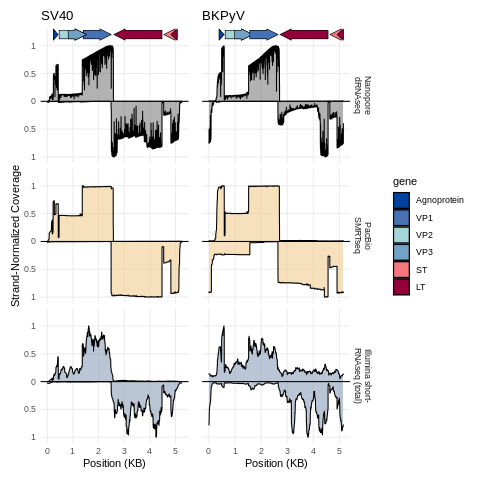

In [9]:
%%R 

SV40_cov_plt <- ggplot() +
  geom_gene_arrow(data = sv40_genes %>% mutate(Sequencing_Method="NP"), aes(xmin = start, xmax = end, y = 1.2, fill = gene, label=gene, forward=direction)) +
  geom_density(
    data=SV40_cov_agg_f,
    aes(x = pos, y=norm_cov, fill=Sequencing_Method),
    color="black",
    alpha=.6,
    stat="identity"
  ) +
  geom_density(
    data=SV40_cov_agg_r,
    aes(x = pos, y=-norm_cov, fill=Sequencing_Method),
    color="black",
    alpha=.6,
    stat="identity"
  ) +
  theme_minimal() +
  geom_hline(yintercept = 0) +
  scale_y_continuous(breaks=c(-1, -0.5, 0, 0.5, 1), labels=abs(c(-1, -0.5, 0, 0.5, 1))) +
  scale_fill_manual(values=c(technology_colors, virus_gene_fill), breaks=sv40_genes$gene) +
  facet_grid(rows=vars(factor(Sequencing_Method, levels=c("NP", "SMRTseq", "Illumina"))),
             labeller = as_labeller(c("NP" = "Nanopore\ndRNAseq", 
                                      "SMRTseq" = "PacBio\nSMRTseq",
                                      "Illumina" = "Illumina short-\nRNAseq (total)"))) +
  ylab("Strand-Normalized Coverage") +
  xlab("Position (KB)") +
  ggtitle("SV40") +
  theme(panel.grid.minor = element_blank()) +
  scale_x_continuous(labels = label_number(scale = 1/1000, accuracy=1))


BK_cov_plt <- ggplot() +
  geom_gene_arrow(data = bk_genes %>% mutate(Sequencing_Method="NP"), aes(xmin = start, xmax = end, y = 1.2, fill = gene, label=gene, forward=direction)) +
  geom_density(
    data=BK_cov_agg_f,
    aes(x = pos, y=norm_cov, fill=Sequencing_Method),
    color="black",
    alpha=.6,
    stat="identity"
  ) +
  geom_density(
    data=BK_cov_agg_r,
    aes(x = pos, y=-norm_cov, fill=Sequencing_Method),
    color="black",
    alpha=.6,
    stat="identity"
  ) +
  theme_minimal() +
  geom_hline(yintercept = 0) +
  scale_y_continuous(breaks=c(-1, -0.5, 0, 0.5, 1), labels=abs(c(-1, -0.5, 0, 0.5, 1))) +
  scale_fill_manual(values=c(technology_colors, virus_gene_fill), breaks=sv40_genes$gene) +
  facet_grid(rows=vars(factor(Sequencing_Method, levels=c("NP", "SMRTseq", "Illumina"))),
             labeller = as_labeller(c("NP" = "Nanopore\ndRNAseq", 
                                      "SMRTseq" = "PacBio\nSMRTseq",
                                      "Illumina" = "Illumina short-\nRNAseq (total)"))) +
  ylab("Strand-Normalized Coverage") +
  xlab("Position (KB)") +
  ggtitle("BKPyV") +
  theme(panel.grid.minor = element_blank()) + 
  scale_x_continuous(labels = label_number(scale = 1/1000, accuracy=1))



SV40_BK_cov_plt <- SV40_cov_plt + theme(strip.text = element_blank()) +
  BK_cov_plt + theme(axis.text.y=element_blank(), axis.title.y = element_blank()) +
  plot_layout(guides="collect")

SV40_BK_cov_plt

Function - Merging percentages for pacbio and dRNAseq


In [10]:
%%R
aggregate_by_intron <- function(SMRTseq_tbl, dRNAseq_tbl="", pos_delimiter = "_", intron_delimiter="\n") {
  # This function merges a pacbio tibble and nanopore tibble
  # to report the percentage of transcripts in the transcript
  # class via each approach. Percentage is based on what was input,
  # so probably only put in late or only put in early transcript
  # classes.
  
  # If only one tibble is input, it will output the condensed 
  # tibble for just that one.
  
  # pos_delimiter: separates 5' and 3' of a junction
  # intron_delimiter: separates multi introns
  
  # Filter just to keep intron information for each class
  SMRTseq_tbl <- SMRTseq_tbl %>%
    filter(span_type == "intron") %>%
    select(start, end, tx_class, tx_class_count) %>%
    distinct() %>%
    arrange(-tx_class_count)
  
  # Aggregate junction information
  SMRTseq_tbl <- SMRTseq_tbl %>%
    mutate(tx_class_perc = 100*tx_class_count/sum(tx_class_count)) %>%
    mutate(junc = paste(start, end, sep=pos_delimiter)) %>%
    group_by(tx_class, tx_class_count, tx_class_perc) %>%
    summarise(agg_juncs = paste(junc, collapse=intron_delimiter)) %>%
    ungroup()
  colnames(SMRTseq_tbl) <- c("SMRTseq_tx_class", "SMRTseq_count", "SMRTseq_perc", "juncs")
  if (dRNAseq_tbl == "") {
    colnames(SMRTseq_tbl) <- c("tx_class", "count", "perc", "juncs")
    return(SMRTseq_tbl)
  }
  
  # Now same for second tibble
  dRNAseq_tbl <- dRNAseq_tbl %>%
    filter(span_type == "intron") %>%
    select(start, end, tx_class, tx_class_count) %>%
    distinct() %>%
    arrange(-tx_class_count)

  dRNAseq_tbl <- dRNAseq_tbl %>%
    mutate(tx_class_perc = 100*tx_class_count/sum(tx_class_count)) %>%
    mutate(junc = paste(start, end, sep=pos_delimiter)) %>%
    group_by(tx_class, tx_class_count, tx_class_perc) %>%
    summarise(agg_juncs = paste(junc, collapse=intron_delimiter)) %>%
    ungroup()
  colnames(dRNAseq_tbl) <- c("dRNAseq_tx_class", "dRNAseq_count", "dRNAseq_perc", "juncs")
  
  
  # Merge by juncs
  full_join(
    SMRTseq_tbl,
    dRNAseq_tbl,
    by="juncs"
  ) %>%
    select(juncs, SMRTseq_perc, dRNAseq_perc, SMRTseq_tx_class, dRNAseq_tx_class)
}

SV40 UpSet plot

`summarise()` has grouped output by 'tx_class', 'tx_class_count'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'tx_class', 'tx_class_count'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'tx_class', 'tx_class_count'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'tx_class', 'tx_class_count'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'tx_class', 'tx_class_count'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'tx_class', 'tx_class_count'. You can override using the `.groups` argument.


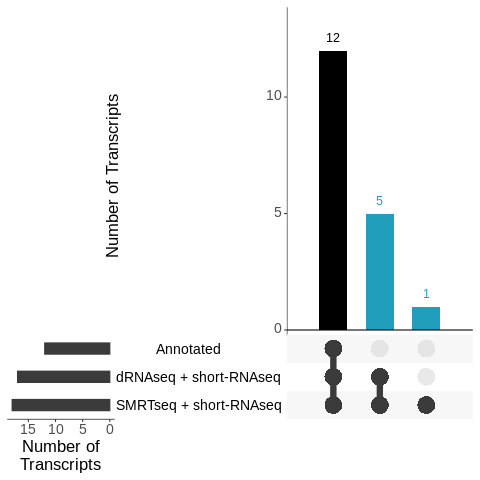

In [11]:
%%R
SV40_SMRTseq_dRNAseq_agg_f <- aggregate_by_intron(SV40_SMRTseq_f, SV40_dRNA_f)
SV40_SMRTseq_dRNAseq_agg_r <- aggregate_by_intron(SV40_SMRTseq_r, SV40_dRNA_r)

# Specifically for SV40, also add replicate two
SV40_SMRTseq_dRNAseq_agg_f <- aggregate_by_intron(SV40_dRNA_rep2_f) %>%
  select(juncs, tx_class, perc) %>%
  rename(dRNAseq_rep2_tx_class = tx_class,
         dRNAseq_rep2_perc = perc
         ) %>%
  full_join(
    SV40_SMRTseq_dRNAseq_agg_f,
    by="juncs"
  ) %>%
  select(juncs, contains("perc"), everything())

SV40_SMRTseq_dRNAseq_agg_r <- aggregate_by_intron(SV40_dRNA_rep2_r) %>%
  select(juncs, tx_class, perc) %>%
  rename(dRNAseq_rep2_tx_class = tx_class,
         dRNAseq_rep2_perc = perc
         ) %>%
  full_join(
    SV40_SMRTseq_dRNAseq_agg_r,
    by="juncs"
  ) %>%
  select(juncs, contains("perc"), everything())


# FILTERING CONDITONS:
# Must be a known transcript or above 0.1% in SMRTseq or NP.
sv40_known_classes <- c(1, 2, 3, 4, 5, 7, 9, 11, 6, 8, 65, 270, 99999)

# SV40 forward
SV40_SMRTseq_dRNAseq_agg_f <- SV40_SMRTseq_dRNAseq_agg_f %>%
  filter( SMRTseq_perc > 0.1 | dRNAseq_perc > 0.1 | dRNAseq_rep2_perc > 0.1 | SMRTseq_tx_class %in% sv40_known_classes) %>%
  # Label canonical
  mutate(canonical = "Novel",
         canonical = ifelse(SMRTseq_tx_class == 1, "G", canonical),
         canonical = ifelse(SMRTseq_tx_class == 2, "D", canonical),
         canonical = ifelse(SMRTseq_tx_class == 3, "H", canonical),
         canonical = ifelse(SMRTseq_tx_class == 4, "C", canonical),
         canonical = ifelse(SMRTseq_tx_class == 5, "E", canonical),
         canonical = ifelse(SMRTseq_tx_class == 7, "B", canonical),
         canonical = ifelse(SMRTseq_tx_class == 9, "F", canonical),
         canonical = ifelse(SMRTseq_tx_class == 11, "I", canonical),
         canonical = ifelse(canonical=="", "Novel", canonical),
         canonical = ifelse(is.na(canonical), "Novel", canonical)) %>%
  mutate(status = ifelse(canonical == "Novel", "Novel", "Known")) %>%
  mutate(virus = "SV40", type="Late")

# SV40 rev
SV40_SMRTseq_dRNAseq_agg_r <- SV40_SMRTseq_dRNAseq_agg_r %>%
  filter( SMRTseq_perc > 0.1 | dRNAseq_perc > 0.1 | dRNAseq_rep2_perc > 0.1 | SMRTseq_tx_class %in% sv40_known_classes) %>%
  # Label canonical
  mutate(canonical = "Novel",
         canonical = ifelse(SMRTseq_tx_class == 6, "LT", canonical),
         canonical = ifelse(SMRTseq_tx_class == 8, "ST", canonical),
         canonical = ifelse(SMRTseq_tx_class == 65, "17kT", canonical),
         canonical = ifelse(SMRTseq_tx_class == 270, "superT", canonical),
         canonical = ifelse(SMRTseq_tx_class == 99999, "superT*", canonical),
         canonical = ifelse(is.na(canonical), "Novel", canonical)) %>%
  mutate(status = ifelse(canonical == "Novel", "Novel", "Known")) %>%
  mutate(virus = "SV40", type="Early") %>%
  
  # superT* is novel
  mutate(status = ifelse(canonical == "superT*", "Novel", status))


# aggregate
SV40_SMRTseq_dRNAseq_agg <-
  rbind(
    SV40_SMRTseq_dRNAseq_agg_f,
    SV40_SMRTseq_dRNAseq_agg_r
  )

# Make sublists for upset plot
SV40_annotated_list <- SV40_SMRTseq_dRNAseq_agg %>%
  filter(status == "Known") %>%
  pull(juncs)
SV40_SMRTseq_list <- SV40_SMRTseq_dRNAseq_agg %>%
  filter(SMRTseq_perc > 0.0) %>%
  pull(juncs) 
SV40_dRNAseq_list <- SV40_SMRTseq_dRNAseq_agg %>%
  filter(dRNAseq_rep2_perc > 0.0 | dRNAseq_perc > 0.0) %>%
  pull(juncs)

SV40_upset_list <- list(Annotated = SV40_annotated_list,
                        `SMRTseq + short-RNAseq` = SV40_SMRTseq_list,
                        'dRNAseq + short-RNAseq' = SV40_dRNAseq_list)


SV40_upset_plt <- upset(fromList(SV40_upset_list),
      order.by = "degree",
      point.size = 8,
      line.size = 3,
      mainbar.y.label = "Number of Transcripts",
      sets.x.label = "Number of\nTranscripts",
      text.scale = c(2, 2, 2, 2, 2, 2),
      main.bar.color = c("#000000", "#219ebc", "#219ebc")
      )

SV40_upset_plt

BKPyV UpSet plot

`summarise()` has grouped output by 'tx_class', 'tx_class_count'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'tx_class', 'tx_class_count'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'tx_class', 'tx_class_count'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'tx_class', 'tx_class_count'. You can override using the `.groups` argument.


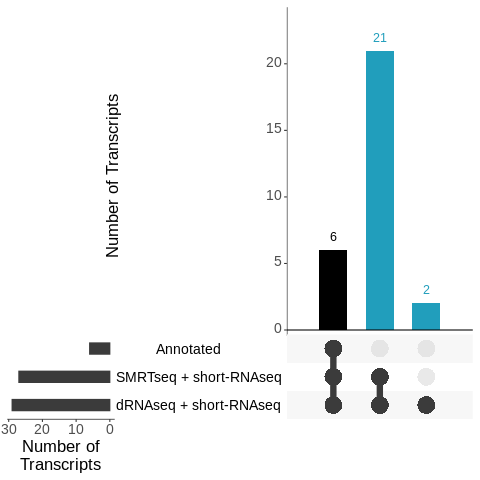

In [12]:
%%R
BK_SMRTseq_dRNAseq_agg_f <- aggregate_by_intron(BK_SMRTseq_f, BK_dunlop1_dRNA_f)
BK_SMRTseq_dRNAseq_agg_r <- aggregate_by_intron(BK_SMRTseq_r, BK_dunlop1_dRNA_r)


# FILTERING CONDITONS:
# Must be a known transcript or above 0.1% in SMRTseq or NP.
# also superT, which was rescued as 99999
bk_SMRTseq_known_classes <- c(1, 2, 4, 7, 71, 75, 99999)

# Also include superT (LT + superT splice) as well as ST+superT splice
bk_dRNAseq_known_classes <- c(244, 516)

# BK forward
BK_SMRTseq_dRNAseq_agg_f <- BK_SMRTseq_dRNAseq_agg_f %>%
  filter( SMRTseq_perc > 0.1 | dRNAseq_perc > 0.1 | SMRTseq_tx_class %in% bk_SMRTseq_known_classes | dRNAseq_tx_class %in% bk_dRNAseq_known_classes) %>%
  # Label canonical
  mutate(canonical = "Novel",
         canonical = ifelse(SMRTseq_tx_class == 1, "16S", canonical),
         canonical = ifelse(SMRTseq_tx_class == 2, "19S", canonical),
         canonical = ifelse(is.na(canonical), "Novel", canonical)) %>%
  mutate(status = ifelse(canonical == "Novel", "Novel", "Known")) %>%
  mutate(virus = "BKPyV", type="Late")

# 1 - 16S
# 2 - 19S


# BK rev
BK_SMRTseq_dRNAseq_agg_r <- BK_SMRTseq_dRNAseq_agg_r %>%
  filter( SMRTseq_perc > 0.1 | dRNAseq_perc > 0.1 | SMRTseq_tx_class %in% bk_SMRTseq_known_classes | dRNAseq_tx_class %in% bk_dRNAseq_known_classes) %>%
  # Label canonical
  mutate(canonical = "Novel",
         canonical = ifelse(SMRTseq_tx_class == 4, "LT", canonical),
         canonical = ifelse(SMRTseq_tx_class == 7, "ST", canonical),
         canonical = ifelse(SMRTseq_tx_class == 71, "truncLT", canonical),
         canonical = ifelse(SMRTseq_tx_class == 75, "ST*", canonical),
         canonical = ifelse(is.na(canonical), "Novel", canonical)) %>%
  mutate(status = ifelse(canonical == "Novel", "Novel", "Known")) %>%
  mutate(virus = "BKPyV", type="Early")

# Label superT (LT + superT splice) as well as ST+superT splice. These are novel, but should be named
BK_SMRTseq_dRNAseq_agg_r <- BK_SMRTseq_dRNAseq_agg_r %>%
  mutate(canonical = ifelse(dRNAseq_tx_class == 244, "superT", canonical)) %>%
  mutate(canonical = ifelse(dRNAseq_tx_class == 516, "superT*", canonical)) %>%
  mutate(canonical = replace_na(canonical, "Novel"))

# aggregate
BK_SMRTseq_dRNAseq_agg <-
  rbind(
    BK_SMRTseq_dRNAseq_agg_f,
    BK_SMRTseq_dRNAseq_agg_r
  )

# Make sublists for upset plot
BK_annotated_list <- BK_SMRTseq_dRNAseq_agg %>%
  filter(status == "Known") %>%
  pull(juncs)
BK_SMRTseq_list <- BK_SMRTseq_dRNAseq_agg %>%
  filter(SMRTseq_perc > 0.0) %>%
  pull(juncs)
BK_dRNAseq_list <- BK_SMRTseq_dRNAseq_agg %>%
  filter(dRNAseq_perc > 0.0) %>%
  pull(juncs)


BK_upset_list <- list(Annotated = BK_annotated_list,
                        `SMRTseq + short-RNAseq` = BK_SMRTseq_list,
                        'dRNAseq + short-RNAseq' = BK_dRNAseq_list)


BK_upset_plt <- upset(fromList(BK_upset_list),
      order.by = "degree",
      point.size = 8,
      line.size = 3,
      mainbar.y.label = "Number of Transcripts",
      sets.x.label = "Number of\nTranscripts",
      text.scale = c(2, 2, 2, 2, 2, 2),
      main.bar.color = c("#000000", "#219ebc", "#219ebc")
      )
BK_upset_plt


Polysome analysis - polysome vs input relative abundance

`summarise()` has grouped output by 'tx_class', 'strand'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'tx_class', 'strand'. You can override using the `.groups` argument.


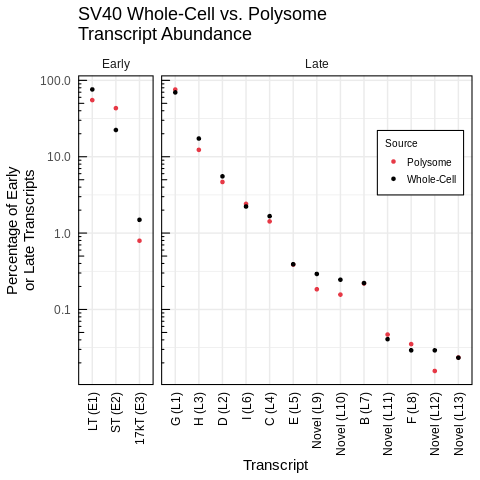

In [13]:
%%R
SV40_introns_to_ID <- hash(SV40_transcript_tibble$introns, paste(SV40_transcript_tibble$description, " (", SV40_transcript_tibble$ID, ")", sep=""))

#--------------------------------#
# Inputs
polysome <- SV40_polysome
input <- SV40_polysome_input
introns_to_ID_hash <- SV40_introns_to_ID
#--------------------------------#

input_vs_polysome_percentages_plt <- aggregate_by_intron_stranded(polysome, input) %>%
  select(juncs, strand, polysome_perc = tbl1_p, input_perc = tbl2_p, polysome_tx_class = tbl1_class, input_tx_class = tbl2_class) %>%
  mutate_all(funs(replace_na(., 0))) %>%
  mutate(ratio = polysome_perc/input_perc) %>%
  mutate(ID = hash_lookup(introns_to_ID_hash, juncs)) %>%
  filter(!is.na(ID)) %>%
  arrange(-input_perc) %>%
  group_by(strand) %>%
  mutate(order = row_number()) %>%
  mutate(strand = ifelse(strand == "+", "Late", "Early")) %>%
  melt(id.vars = c("ID", "juncs", "strand", "order", "ratio", "polysome_tx_class", "input_tx_class")) %>%
  mutate(variable = ifelse(variable == "polysome_perc", "Polysome", "Whole-Cell")) %>%
  

  ggplot() +
  
  geom_point(
    aes(x = reorder(ID, order), y = value, color=variable)
  ) + 

  
  
  # Aesthetics
  facet_grid(~strand, scales = "free", space="free") +
  scale_y_continuous(trans = "log10") +
  theme_minimal(base_size = 15) +
  theme(panel.border = element_rect(size=1, fill=NA),
        axis.text.x = element_text(angle = 90, hjust = 1, color="black", vjust=0.5),
        legend.background = element_rect(size = 0.5),
        legend.text = element_text(size = 10),
        legend.title = element_text(size = 10)) +
  labs(color = "Source") +
  xlab("Transcript") +
  ylab("Percentage of Early\nor Late Transcripts") +
  annotation_logticks(side="l") +
  scale_color_manual(values = c("Polysome" = "#e63946", "Whole-Cell" = "#000000")) +
  theme(legend.position = c(0.868, 0.718)) +
  ggtitle("SV40 Whole-Cell vs. Polysome\nTranscript Abundance")


input_vs_polysome_percentages_plt